In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import pymongo

In [2]:
try:
    conn=pymongo.MongoClient()
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
    print ("Could not connect to MongoDB: {}s".format(e)) 
conn

Connected successfully!!!


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
conn.database_names()

['admin', 'local', 'morphia_example', 'rails_test', 'testing', 'vscode']

In [4]:
vscode = conn.vscode

In [5]:
vscode.collection_names()

['Issues']

In [6]:
vs = vscode.Issues

In [7]:
vs.find().count()

52533

In [8]:
vs.find_one({'number':69})

{'_id': ObjectId('5b2debe95660c81c085b8321'),
 'assigned': [['22350', '2015-11-18T17:24:48Z'],
  ['900690', '2015-11-19T14:23:33Z'],
  ['22350', '2015-12-21T19:59:15Z']],
 'body': "Whenever I try to install any extension, using _ext install_, I get a **connect ETIMEDOUT 191.238.172.191:443** error.\n\nTrying to navigate to **https://191.238.172.191** in the browser produces a warning regarding the certificate being valid only for ***.market.visualstudio.com**, but I'm allowed to proceed.\n\nShouldn't VSCode try to connect to the name instead of the IP?\n\nI'm behind a proxy, VSCode updates just fine behind it, and also lists the available extensions. The firewall here logs the invalid certificate but allows the connection to proceed. Doesn't look like a problem in my end...\n\n**OS:** Windows 7\n**VSCode:** 0.10.1\n",
 'className': 'Issue',
 'comments': 118,
 'created_at': '2015-11-18T17:22:44Z',
 'creator': 759416,
 'crossReferences': ['https://api.github.com/repos/Microsoft/vscode/is

In [9]:
vs.find_one({'number':69})["labeled"]

['bug', 'important', 'verified']

In [10]:
vs.find_one({'number':69}).keys()

dict_keys(['_id', 'className', 'url', 'number', 'title', 'body', 'state', 'creator', 'created_at', 'reponame', 'organization', 'comments', 'subscribed', 'mentioned', 'labeled', 'status', 'assigned', 'unassigned', 'crossReferences'])

In [11]:
vs.find({"labeled":"bug"}).count()

11864

In [12]:
labels = [cur['labeled'] for cur in vs.find() if 'labeled' in cur]

In [13]:
len(labels)

46386

In [14]:
labels[55]

['tasks', 'WSL']

In [15]:
df = pd.DataFrame(labels)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,extensions,None,None,None,None,None,None,None,None,None,None,None,None,None
1,javascript,None,None,None,None,None,None,None,None,None,None,None,None,None
2,debug,question,None,None,None,None,None,None,None,None,None,None,None,None
3,editor,editor-core,None,None,None,None,None,None,None,None,None,None,None,None
4,feature-request,file-explorer,None,None,None,None,None,None,None,None,None,None,None,None


## Assigned users

In [17]:
users = [cur['assigned'] for cur in vs.find() if 'assigned' in cur]

In [18]:
users2 = [eachuser[0] for sublist in users for eachuser in sublist]

In [19]:
pd_users = pd.Series(users2)

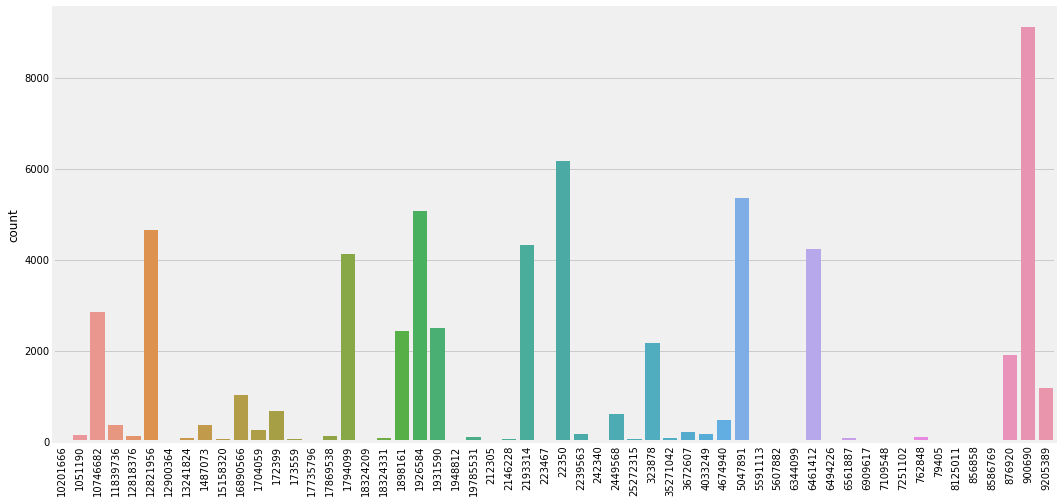

In [20]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')

sns.countplot(pd_users)

## Unassigned users

In [21]:
unassiged = [cur['unassigned'] for cur in vs.find() if 'unassigned' in cur]
unassigned2 = [eachuser[0] for sublist in unassiged for eachuser in sublist]

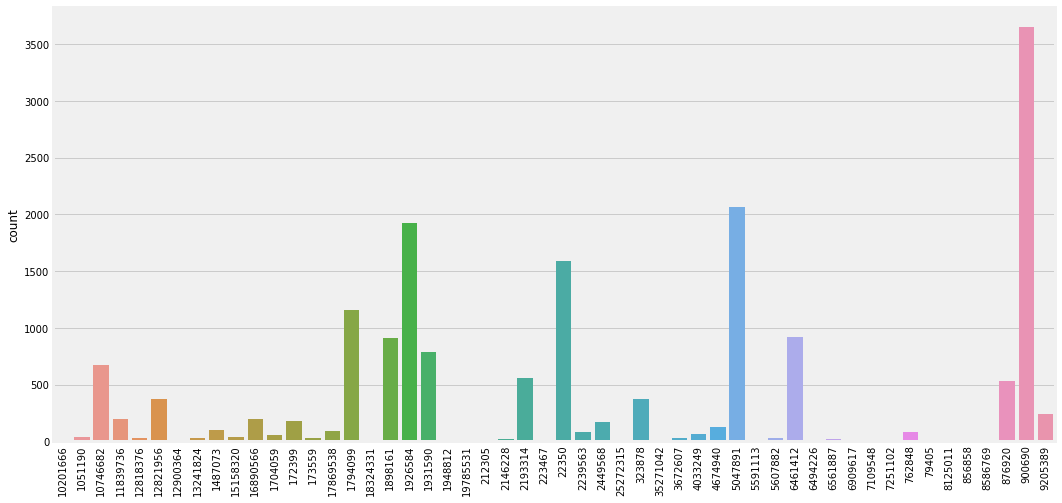

In [22]:
pd_unassigned = pd.Series(unassigned2)

plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')

sns.countplot(pd_unassigned)

In [23]:
pd_users.value_counts()

900690      9113
22350       6170
5047891     5355
1926584     5072
12821956    4660
2193314     4330
6461412     4225
1794099     4120
10746682    2841
1931590     2503
1898161     2426
323878      2172
876920      1895
9205389     1180
16890566    1025
172399       663
2449568      595
4674940      466
11839736     361
1487073      354
1704059      248
3672607      200
4033249      172
2239563      166
1051190      152
12818376     126
17869538     113
19785531     106
762848       100
18324331      76
13241824      74
6561887       67
35271042      65
25272315      58
15158320      52
173559        51
2146228       50
5607882       38
8586769       30
12900364      27
79405         26
1948812       16
17735796      15
856858         7
7109548        7
6909617        7
242340         4
5591113        4
8125011        3
6494226        2
223467         2
18324209       2
212305         1
10201666       1
6344099        1
7251102        1
dtype: int64

In [24]:
pd_unassigned.value_counts()

900690      3650
5047891     2064
1926584     1924
22350       1586
1794099     1162
6461412      918
1898161      915
1931590      791
10746682     672
2193314      560
876920       535
323878       377
12821956     374
9205389      243
11839736     201
16890566     198
172399       179
2449568      171
4674940      123
1487073       97
17869538      91
2239563       80
762848        80
4033249       62
1704059       60
1051190       40
15158320      39
12818376      32
173559        28
5607882       28
13241824      28
3672607       27
2146228       24
6561887       17
18324331      15
79405         13
856858         7
7109548        6
35271042       5
8586769        4
12900364       4
25272315       3
19785531       3
5591113        3
6909617        3
6494226        2
8125011        2
1948812        2
223467         1
10201666       1
7251102        1
212305         1
dtype: int64

In [25]:
df = pd.DataFrame(index= pd_users.value_counts().index)

In [26]:
df = df.assign(assigned=pd_users.value_counts().values)


In [27]:
unass = pd.DataFrame(pd_unassigned.value_counts())

In [28]:
df = df.join(unass, how='left')
df.columns=["times_assigned", "times_unassigned"]

In [29]:
df.head()

,times_assigned,times_unassigned
900690,9113,3650.0
22350,6170,1586.0
5047891,5355,2064.0
1926584,5072,1924.0
12821956,4660,374.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 900690 to 7251102
Data columns (total 2 columns):
times_assigned      56 non-null int64
times_unassigned    52 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.8+ KB


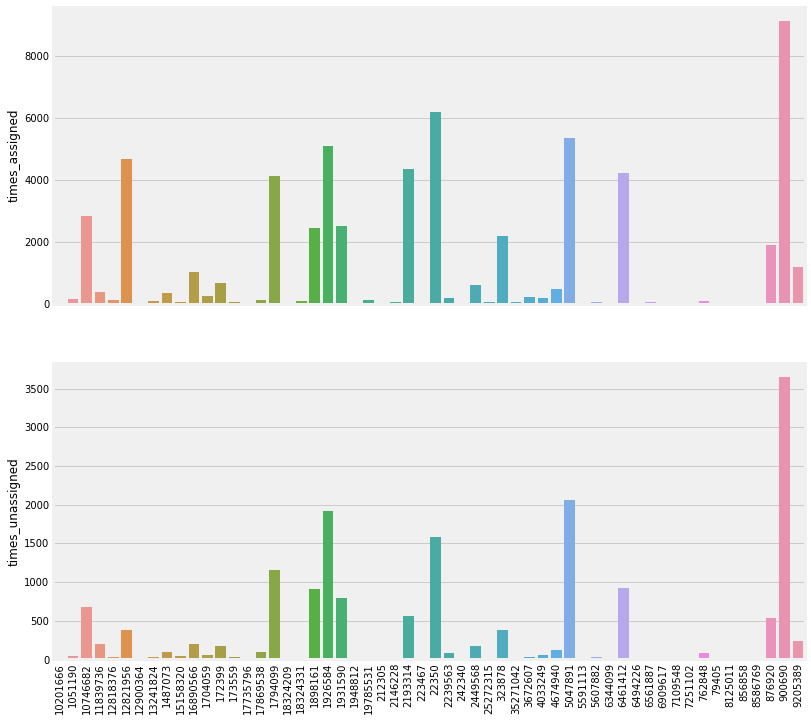

In [39]:
fig, axs = plt.subplots(2,1,  figsize=[12,12], sharex=True)

sns.barplot(x=df.index, y='times_assigned', data=df, ax=axs[0])
sns.barplot(x=df.index, y='times_unassigned', data=df, ax=axs[1])
plt.xticks(rotation="vertical");

In [40]:
df.head()

,times_assigned,times_unassigned
900690,9113,3650.0
22350,6170,1586.0
5047891,5355,2064.0
1926584,5072,1924.0
12821956,4660,374.0


In [41]:
df["reassignments_%"] = df["times_unassigned"]/df["times_assigned"]

In [42]:
df.head()

,times_assigned,times_unassigned,reassignments_%
900690,9113,3650.0,0.400527
22350,6170,1586.0,0.257050
5047891,5355,2064.0,0.385434
1926584,5072,1924.0,0.379338
12821956,4660,374.0,0.080258


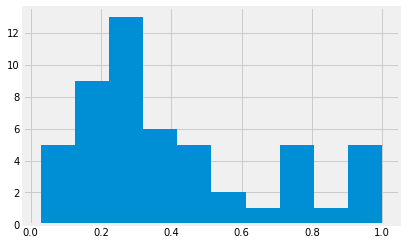

In [48]:
df["reassignments_%"].hist(bins=10)

In [50]:
df.sort_values(by="reassignments_%", ascending=False)

,times_assigned,times_unassigned,reassignments_%
7251102,1,1.0,1.000000
856858,7,7.0,1.000000
10201666,1,1.0,1.000000
212305,1,1.0,1.000000
6494226,2,2.0,1.000000
7109548,7,6.0,0.857143
17869538,113,91.0,0.805310
762848,100,80.0,0.800000
5591113,4,3.0,0.750000
15158320,52,39.0,0.750000
